# Step 0 : Imports and reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')
# pd.set_option('display.max_columns', 200)

df = pd.read_csv('datasets/roller_coaster_db.csv')

# Step 1 : Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.describe()

# Step 2 : Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns
- Feature Creation

In [ ]:
# Removing single columns
# df.drop(['Opening date'], axis=1)

In [ ]:
df = df[['coaster_name',
    #'Length', 'Speed', 
    'Location', 'Status', 
    # 'Opening date','Type',
     'Manufacturer',
    #  'Height restriction', 'Model', 'Height',
    #   'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date',
    'Opened',
    #  'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #    'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()
df

In [ ]:
# Changing the datatype
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df['opening_date_clean']

In [ ]:
# Rename our columns
df = df.rename(columns={
    'coaster_name':'Coaster_Name',
    'year_introduced':'Year_Introduced',
    'opening_date_clean':'Opening_Date',
    'speed_mph':'Speed_mph',
    'height_ft':'Height_ft',
    'Inversion_clean':'Inversions',
    'Gforce_clean':'Gforce'})

In [ ]:
df.isna() # For every cell Tells if there is a null value
df.isna().sum() # Tells the count of missing values for each column

In [ ]:
df.duplicated() # Tells if a row is duplicate
df.loc[df.duplicated]

In [ ]:
df.duplicated(subset="Coaster_Name") # Checking dupiclates in a column
df.loc[df.duplicated(subset="Coaster_Name")]

In [ ]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

In [ ]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
.reset_index(drop=True).copy()

In [ ]:
df.shape

# Step 3 : Feature Understanding
(Univariate Analysis)
- Plotting Feature Distributions
   - Histogram
   - KDE
   - Boxplot

Text(0, 0.5, 'Count')

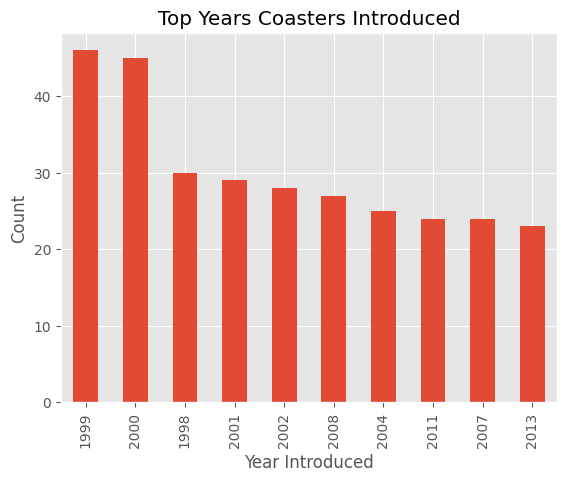

In [152]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Top Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

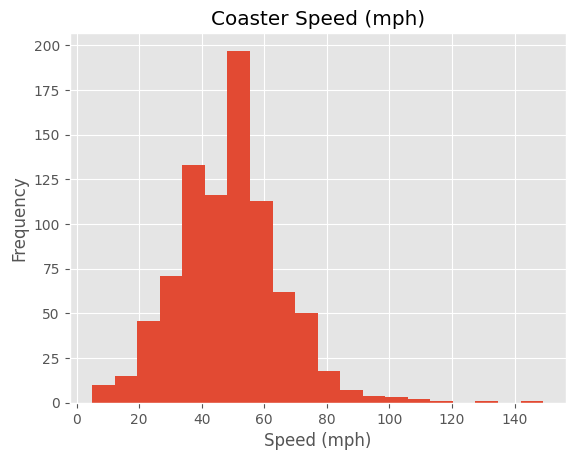

In [153]:
ax = df['Speed_mph'].plot(kind='hist',bins=20,title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

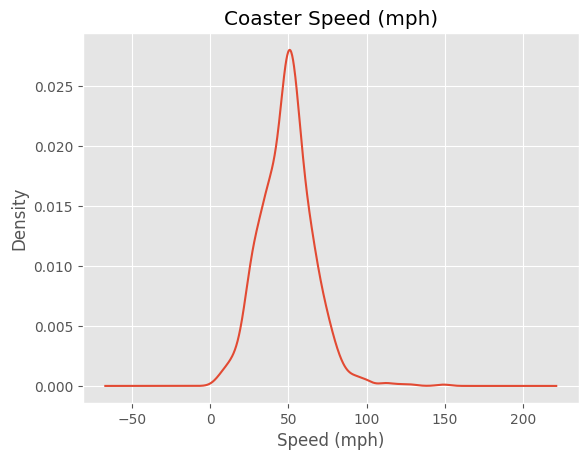

In [154]:
ax = df['Speed_mph'].plot(kind='kde',title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')